# ME:4111 Scientific Computing and Machine Learning 
# Lecture 28: SVR and Unsupervised Learning - SVR (Linear regression)
# by Prof. Shaoping Xiao

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [9]:
Fire= pd.read_csv('Fires.csv')
Fire.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [18]:
#print(['Fire'])
#y = Fire['area'].values
print(len(Fire))
#X = Fire['temp'].values


X = Fire.iloc[:, 8:9].values 
y = Fire.iloc[:, 12].values 


517


### Generate Data Points

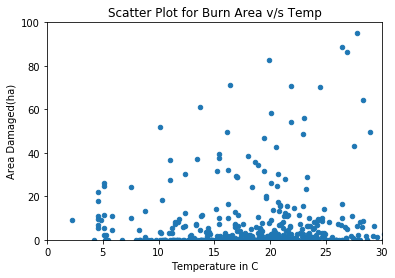

In [24]:
plt.figure()
plt.title('Scatter Plot for Burn Area v/s Temp')
plt.scatter(X, y, s=20)
plt.xlabel('Temperature in C')
plt.ylabel('Area Damaged(ha)')
plt.xlim(0,30)
plt.ylim(0,100)
plt.show()

### training/test split (test size is 20%)

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 50) 


### Adding Polynomial Features

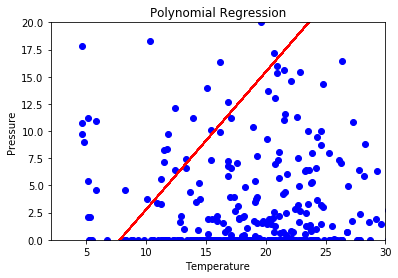

In [44]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
  
poly = PolynomialFeatures(degree = 1) 
X_poly = poly.fit_transform(X_train) 
  
poly.fit(X_poly, y_train) 
lin = LinearRegression() 
lin.fit(X_poly, y_train)
y_poly = lin.predict(poly.fit_transform(X_train))


# Visualizing the Polymonial Regression results
plt.scatter(X_train, y_train, color = 'blue') 
  
plt.plot(X_train, y_poly, color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('Temperature') 
plt.ylabel('Pressure') 
plt.xlim(2,30)
plt.ylim(0,20)
plt.show() 


### compare to the least-square linearRegression

In [39]:
#SVR implemntation with SVM module within sklearn class

from sklearn.svm import SVR
X_train = X_train.reshape (-1,1)
y_train = y_train.reshape (-1,1)
Lreg_C = 1.0 # Penalty parameter C of the error term
LregSVR = SVR(kernel='linear', C=Lreg_C)
LregSVR.fit(X_train, y_train)
yR_pred = LregSVR.predict(X_train)

C:\Users\chorn\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


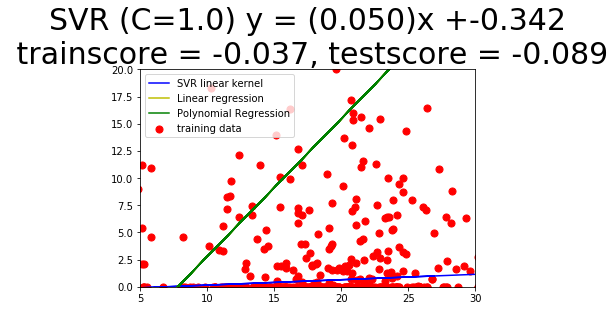

In [43]:

X_train = X_train.reshape (-1,1)
y_train = y_train.reshape (-1,1)
X_test = X_test.reshape(-1,1)
y_test = y_test.reshape(-1,1)
linreg = LinearRegression().fit(X_train, y_train)
yL_pred = linreg.predict(X_train)

train_score=LregSVR.score(X_train, y_train)
test_score=LregSVR.score(X_test, y_test)
Ltrain_score=linreg.score(X_train, y_train)
Ltest_score=linreg.score(X_test, y_test)


plt.title('SVR (C={}) y = ({:.3f})x +{:.3f}\n trainscore = {:.3f}, testscore = {:.3f}'
          .format(Lreg_C, LregSVR.coef_[0,0], LregSVR.intercept_[0], train_score, test_score), size=30)
plt.scatter(X_train, y_train, marker= 'o', c='red', s=50, label='training data')
plt.plot(X_train, yR_pred, 'b-', label='SVR linear kernel')
plt.plot(X_train, yL_pred, 'y-', label='Linear regression')
plt.plot(X_train, y_poly, 'g-', label='Polynomial Regression')
#plt.xlabel('LS Reg y = ()\n trainscore = 'print(Ltrain_score)', 'testscore' = 'print(LTest_score)')
plt.legend(loc='upper left', scatterpoints=1, numpoints=1)
plt.xlim(5,30)
plt.ylim(0,20)
plt.show()


In [ ]:
clear